# Descripcion del proyecto

Estás trabajando como analista para Zuber, una nueva empresa de viajes compartidos que se está lanzando en Chicago. Tu tarea es encontrar patrones en la información disponible. Quieres comprender las preferencias de los pasajeros y el impacto de los factores externos en los viajes.
Al trabajar con una base de datos, analizarás los datos de los competidores y probarás una hipótesis sobre el impacto del clima en la frecuencia de los viajes.

# Descripción de los datos


Una base de datos con información sobre viajes en taxi en Chicago:

tabla neighborhoods: datos sobre los barrios de la ciudad

name: nombre del barrio

neighborhood_id: código del barrio

tabla cabs: datos sobre los taxis

cab_id: código del vehículo

vehicle_id: ID técnico del vehículo

company_name: la empresa propietaria del vehículo

tabla trips: datos sobre los viajes

trip_id: código del viaje

cab_id: código del vehículo que opera el viaje

start_ts: fecha y hora del inicio del viaje (tiempo redondeado a la hora)

end_ts: fecha y hora de finalización del viaje (tiempo redondeado a la hora)

duration_seconds: duración del viaje en segundos

distance_miles: distancia del viaje en millas

pickup_location_id: código del barrio de recogida

dropoff_location_id: código del barrio de finalización

tabla weather_records: datos sobre el clima

record_id: código del registro meteorológico

ts: fecha y hora del registro (tiempo redondeado a la hora)

temperature: temperatura cuando se tomó el registro

description: breve descripción de las condiciones meteorológicas, por ejemplo, "lluvia ligera" o "nubes dispersas"

#  Análisis exploratorio de datos (Python)

## Diccionario de datos

Además de los datos que recuperaste en las tareas anteriores te han dado un segundo archivo. Ahora tienes estos dos CSV:

/datasets/project_sql_result_01.csv. contiene los siguientes datos:

company_name: nombre de la empresa de taxis

trips_amount: el número de viajes de cada compañía de taxis el 15 y 16 de noviembre de 2017. 

/datasets/project_sql_result_04.csv. contiene los siguientes datos:

dropoff_location_name: barrios de Chicago donde finalizaron los viajes

average_trips: el promedio de viajes que terminaron en cada barrio en noviembre de 2017.

## Plan de accion

* importar los archivos

* estudiar los datos que contienen

* asegurarte de que los tipos de datos sean correctos

* identificar los 10 principales barrios en términos de finalización del recorrido

* hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

* sacar conclusiones basadas en cada gráfico y explicar los resultados

## Preparacion de datos

### Importacion de librerias

In [1]:
#En esta seccion se importaran todas las librerias que vamos a necesitar

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st
import seaborn as sns
import plotly.express as px
import requests
from bs4 import BeautifulSoup

### Importacion de archivos CSV

In [2]:
#traemos el archivo y lo leemos
data = pd.read_csv("/datasets/project_sql_result_01.csv")
#se muestra el resultado
data

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,2241 - 44667 - Felman Corp,3


In [3]:
#Repetimos el procedimiento con el otro archivo.
data1 = pd.read_csv("/datasets/project_sql_result_04.csv")
data1

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [4]:
#miramos el tipo de datos que contiene cada tabla.
print(data.info())
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


Hasta este punto parece que al menos los tipos de dato son correctos.

In [5]:
loop_air = pd.read_csv("/datasets/project_sql_result_07.csv")

### Verificacion de datos

In [6]:
#miraremos que no hayan duplicados y datos ausentes en la siguiente parte.

print("la cantidad de datos duplicados de data es:", data.duplicated().sum())

print("la cantidad de datos duplicados de data1 es:", data1.duplicated().sum())


la cantidad de datos duplicados de data es: 0
la cantidad de datos duplicados de data1 es: 0


No tenemos datos duplicados

In [7]:
loop_air.duplicated().sum()

197

In [8]:
loop_air.nunique()

start_ts               81
weather_conditions      2
duration_seconds      495
dtype: int64

In [9]:
loop_air.sample(40)

,start_ts,weather_conditions,duration_seconds
350,2017-11-11 08:00:00,Good,1320.0
117,2017-11-11 07:00:00,Good,1380.0
306,2017-11-18 06:00:00,Good,1201.0
500,2017-11-11 16:00:00,Good,2220.0
1014,2017-11-04 16:00:00,Bad,2926.0
89,2017-11-04 11:00:00,Good,2574.0
557,2017-11-11 12:00:00,Good,2029.0
592,2017-11-11 10:00:00,Good,1622.0
168,2017-11-11 07:00:00,Good,0.0
646,2017-11-11 13:00:00,Good,4380.0


Aunque vemos datos duplicados puedo creer que por la informacion que tiene la tabla es normal que se repitan algunos datos, asi que no eliminare estos datos duplicados.

In [10]:
#Verificamos datos ausentes
print(data.isna().sum())

print(data1.isna().sum())

company_name    0
trips_amount    0
dtype: int64
dropoff_location_name    0
average_trips            0
dtype: int64


No tenemos valores ausentes

In [11]:
loop_air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


### identificar los 10 principales barrios en términos de finalización del recorrido

In [21]:
main_10_dropoff = data1.groupby("dropoff_location_name")["average_trips"].sum().sort_values(ascending=False).head(10)

In [22]:
main_10_dropoff

dropoff_location_name
Loop                  10727.466667
River North            9523.666667
Streeterville          6664.666667
West Loop              5163.666667
O'Hare                 2546.900000
Lake View              2420.966667
Grant Park             2068.533333
Museum Campus          1510.000000
Gold Coast             1364.233333
Sheffield & DePaul     1259.766667
Name: average_trips, dtype: float64

### hacer gráficos: empresas de taxis y número de viajes, los 10 barrios principales por número de finalizaciones

In [23]:
company_trips = data.groupby("company_name")["trips_amount"].sum().sort_values(ascending=False)
company_trips

company_name
Flash Cab                          19558
Taxi Affiliation Services          11422
Medallion Leasing                  10367
Yellow Cab                          9888
Taxi Affiliation Service Yellow     9299
                                   ...  
4053 - 40193 Adwar H. Nikola           7
2733 - 74600 Benny Jona                7
5874 - 73628 Sergey Cab Corp.          5
2241 - 44667 - Felman Corp             3
3556 - 36214 RC Andrews Cab            2
Name: trips_amount, Length: 64, dtype: int64

<AxesSubplot:title={'center':'Neighborhood Finals'}, ylabel='Dropoff Location Name'>

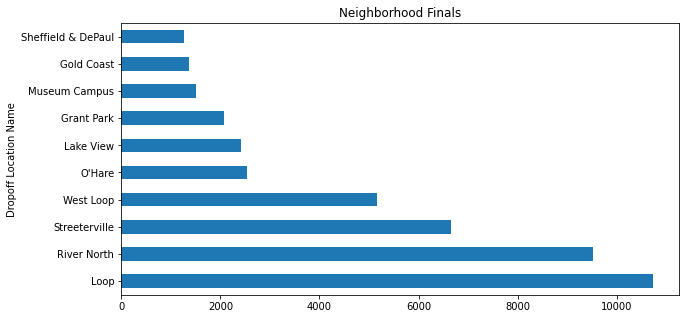

In [24]:
main_10_dropoff.plot(kind="barh", title="Neighborhood Finals", xlabel="Dropoff Location Name", figsize=[10,5])

En este grafico podemos ver que los barrios principales en los que se terminan mas viajes son:

Loop.

River North.

Streeterville.

West Loop.

estos 4 tienen al menos el doble de los demas.

podemos suponer que en estos barrios se terminan mas servicios debido a que son zonas recidensiales de altas cantidades de poblacion.

<AxesSubplot:title={'center':'Company and Trips'}, ylabel="Company Name's">

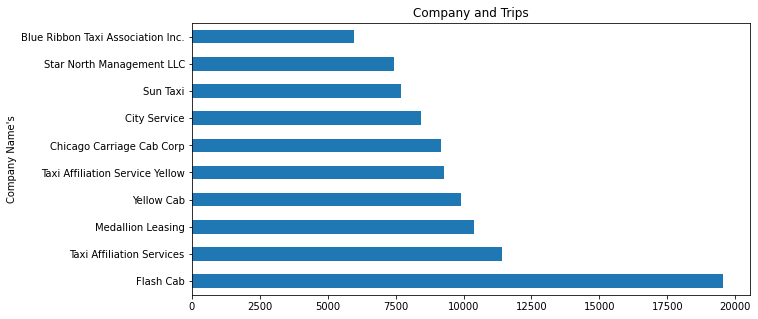

In [26]:
company_more_trips = company_trips.sort_values(ascending=False).head(10)
company_more_trips.plot(kind="barh", title="Company and Trips", xlabel="Company Name's", figsize=[10, 5])


Ahora con este grafico podemos concluir varias cosas.

* Flash Cab es el mayor proveedor de servicios de taxis, ganando por casi el doble al competidor mas cercano.
* Las otras empresas tienen una diferencia mucho menor entre si
* Podemos suponer que la diferencia de servicios se debe a varios motivos:

1 Deben tener una mayor cantidad de carros para poder cubrir la demanda notoriamente mayor, lo que hace que el servicio sea mas rapido y eficiente.

2 Al tener mas carros esta empresa puede abarcar mas barrios y cobrir una mayor zona

3 teniendo en cuenta que la diferencia es tan grande entre esta y las otras empresas es notorio que el servicio es mucho mejor.

# Pruebas de hipótesis

## Planteamiento de hipotesis para ttest

La hipotesis nula: No, La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare no cambia los sábados lluviosos

la hipótesis alternativa: La duración promedio de los viajes desde el Loop hasta el Aeropuerto Internacional O'Hare cambia los sábados lluviosos

## Planteamiento de hipotesis para levene

La hipotesis nula: no hay suficientes evidencias para demostrar que las varianzas son significativamente diferentes

la hipótesis alternativa: hay suficientes evidencias para demostrar que la diferencia entre los valores es estadisticamente significativa.

## qué criterio usaste para probar las hipótesis y por qué

Primeramente se utilizara una prueba de varianza, en caso de que no podamos rechazar la hipotesis nula, entonces voy a usar una prueba de hipotesis de dos colas para obtener uno u otro resultado. Con un ttest con ind para medir dos poblaciones estadisticas.

### Preparacion para ttest

In [17]:
#seleccionamos solo los dias Good
good_day = loop_air.query("weather_conditions == 'Good'")["duration_seconds"]

In [18]:
#repetimos el procedimiento con los dias Bad
bad_day = loop_air.query("weather_conditions == 'Bad'")["duration_seconds"]

## Prueba de varianza

In [19]:
#en la prueba levene se busca probar que las varianzas son iguales
#definimos alpha
alpha = 0.05
#Aplicamos levene
results = st.levene(good_day, bad_day)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 0.5332038671974493
No podemos rechazar la hipotesis nula


### Conclusion de prueba de varianza

 Hay evidencia que respalda la hipotesis nula por lo tanto no la podemos rechazar

In [20]:
#definimos alpha
alpha = 0.05
#Aplicamos ttest
results = st.ttest_ind(good_day, bad_day, equal_var=False)
print("valor p:", results.pvalue)
if results.pvalue < alpha:
    print("Rechazamos la hipotesis nula")
else:
    print("No podemos rechazar la hipotesis nula")

valor p: 6.738994326108734e-12
Rechazamos la hipotesis nula


### Conclusion de la prueba "T"

Segun nuestra prueba podemos decir que si hay un cambio en el tiempo promedio de viaje desde el barrio al aeropuerto.